# Load, explore and prepare data set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

sns. set_style('whitegrid')
titanic = sns. load_dataset('titanic')

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [2]:
#remove label "survived" from data frame and store it seperately
label =titanic.pop("survived")

In [3]:
#store numeric features in a dataframe
titanic_numeric=titanic.select_dtypes(include=np.number)
#store nominal features in a dataframe
titanic_nominal=titanic.select_dtypes(include=object)

In [4]:
#show descriptive statistics for numeric features
titanic_numeric.describe()

,pclass,age,sibsp,parch,fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#replace missing values by median
titanic_numeric['age'] = titanic_numeric['age'].fillna(titanic_numeric['age'].median())

#show descriptive statistics for numeric features
titanic_numeric.describe()

,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#show descriptive statistics for nominal features
titanic_nominal.describe()

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [7]:
#remove feature "alive"
titanic_nominal=titanic_nominal.iloc[:,:-1]
titanic_nominal

,sex,embarked,who,embark_town
0,male,S,man,Southampton
1,female,C,woman,Cherbourg
2,female,S,woman,Southampton
3,female,S,woman,Southampton
4,male,S,man,Southampton
...,...,...,...,...
886,male,S,man,Southampton
887,female,S,woman,Southampton
888,female,S,woman,Southampton
889,male,C,man,Cherbourg


In [8]:
#Show unique values for all nominal features
#use a for loop and the data frame attribute "columns"
for column in titanic_nominal.columns:
    print(column,' unique values: ',titanic_nominal[column].unique())

sex  unique values:  ['male' 'female']
embarked  unique values:  ['S' 'C' 'Q' nan]
who  unique values:  ['man' 'woman' 'child']
embark_town  unique values:  ['Southampton' 'Cherbourg' 'Queenstown' nan]


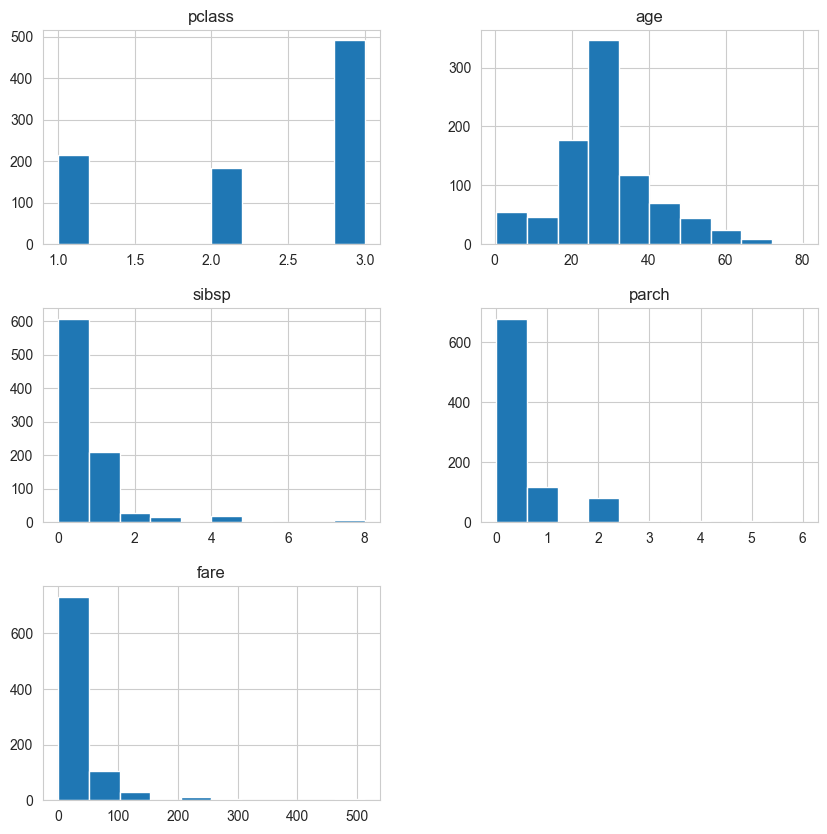

In [9]:
#Show histograms of numeric features
titanic_numeric.hist(figsize=(10,10))
plt.show()

# Feature selection by variance and variation ratio

Numeric features

In [10]:
#min-max normalize numeric features
#min value should be 0, max value should be 100
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100))
titanic_numeric = pd.DataFrame(scaler.fit_transform(titanic_numeric), columns=titanic_numeric.columns)
#show descriptive statistics for normalized features
titanic_numeric.describe()

,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,65.432099,36.367910,6.537598,6.359895,6.285843
std,41.803562,16.360513,13.784293,13.434287,9.699511
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,27.117366,0.000000,0.000000,1.544007
50%,100.000000,34.656949,0.000000,0.000000,2.821272
75%,100.000000,43.453129,12.500000,0.000000,6.050797
max,100.000000,100.000000,100.000000,100.000000,100.000000


In [11]:
#calculate standard deviation of numeric features and show them
numeric_features_std = titanic_numeric.std()
numeric_features_std

pclass    41.803562
age       16.360513
sibsp     13.784293
parch     13.434287
fare       9.699511
dtype: float64

In [12]:
#remove numeric features with standard deviation < 10
titanic_numeric = titanic_numeric.loc[:, titanic_numeric.std() >= 10]
titanic_numeric

,pclass,age,sibsp,parch
0,100.0,27.117366,12.5,0.000000
1,0.0,47.222920,12.5,0.000000
2,100.0,32.143755,0.0,0.000000
3,0.0,43.453129,12.5,0.000000
4,100.0,43.453129,0.0,0.000000
...,...,...,...,...
886,50.0,33.400352,0.0,0.000000
887,0.0,23.347575,0.0,0.000000
888,100.0,34.656949,12.5,33.333333
889,0.0,32.143755,0.0,0.000000


Nominal features

In [13]:
#calculate variation ratio for nominal features
#explanation: The value_counts() method counts the number of occurrences of each unique value in the column, 
#and the normalize=True parameter normalizes the counts to represent percentages of the total number of values in the column
nominal_features_var = titanic_nominal.apply(lambda x: x.value_counts(normalize=True).max(), axis=0)
nominal_features_var_ratio=1-nominal_features_var
nominal_features_var_ratio

sex            0.352413
embarked       0.275591
who            0.397306
embark_town    0.275591
dtype: float64

In [14]:
#remove nominal features with variation ratio < 0.3
titanic_nominal = titanic_nominal.loc[:, nominal_features_var_ratio >= 0.3]
titanic_nominal

,sex,who
0,male,man
1,female,woman
2,female,woman
3,female,woman
4,male,man
...,...,...
886,male,man
887,female,woman
888,female,woman
889,male,man


# Feature selection using correlation and colinearity

In [15]:
titanic_nominal.columns

Index(['sex', 'who'], dtype='object')

In [16]:
#apply target transformation to all nominal features
#apply a for loop and add the target encoded features to "titanic_numeric"
titanic_nominal_label=titanic_nominal.copy()
titanic_nominal_label['label']=label
columns=titanic_nominal.columns
print(columns)

for column in columns:
    mean_encode = titanic_nominal_label.groupby(column)['label'].mean()
    new_column = column + "_TE"
    titanic_numeric[new_column]=titanic_nominal_label[column].map(mean_encode)

#display titanic_numeric
titanic_numeric

Index(['sex', 'who'], dtype='object')


,pclass,age,sibsp,parch,sex_TE,who_TE
0,100.0,27.117366,12.5,0.000000,0.188908,0.163873
1,0.0,47.222920,12.5,0.000000,0.742038,0.756458
2,100.0,32.143755,0.0,0.000000,0.742038,0.756458
3,0.0,43.453129,12.5,0.000000,0.742038,0.756458
4,100.0,43.453129,0.0,0.000000,0.188908,0.163873
...,...,...,...,...,...,...
886,50.0,33.400352,0.0,0.000000,0.188908,0.163873
887,0.0,23.347575,0.0,0.000000,0.742038,0.756458
888,100.0,34.656949,12.5,33.333333,0.742038,0.756458
889,0.0,32.143755,0.0,0.000000,0.188908,0.163873


In [17]:
#calculate correlation of numeric features with label
titanic_numeric_corr = titanic_numeric.corrwith(label)
titanic_numeric_corr

pclass   -0.338481
age      -0.064910
sibsp    -0.035322
parch     0.081629
sex_TE    0.543351
who_TE    0.564497
dtype: float64

In [18]:
#keep 5 best numeric features
titanic_numeric = titanic_numeric[titanic_numeric_corr.abs().sort_values(ascending=False).index[:5]]
#re-calculate correlations with label
titanic_numeric_corr = titanic_numeric.corrwith(label)
titanic_numeric_corr

who_TE    0.564497
sex_TE    0.543351
pclass   -0.338481
parch     0.081629
age      -0.064910
dtype: float64

In [19]:
#calculate colinearity of remaining numeric features
titanic_numeric_corr = titanic_numeric.corr()
# Displaying correlations as a heatmap / correlation matrix
titanic_numeric_corr.style.background_gradient(cmap ='coolwarm')

,who_TE,sex_TE,pclass,parch,age
who_TE,1.000000,0.940167,-0.120767,0.307829,-0.162058
sex_TE,0.940167,1.000000,-0.131900,0.245489,-0.081163
pclass,-0.120767,-0.131900,1.000000,0.018443,-0.339898
parch,0.307829,0.245489,0.018443,1.000000,-0.172482
age,-0.162058,-0.081163,-0.339898,-0.172482,1.000000


In [20]:
titanic_numeric.describe()

,who_TE,sex_TE,pclass,parch,age
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.383838,65.432099,6.359895,36.367910
std,0.274680,0.264391,41.803562,13.434287,16.360513
min,0.163873,0.188908,0.000000,0.000000,0.000000
25%,0.163873,0.188908,50.000000,0.000000,27.117366
50%,0.163873,0.188908,100.000000,0.000000,34.656949
75%,0.756458,0.742038,100.000000,0.000000,43.453129
max,0.756458,0.742038,100.000000,100.000000,100.000000


In [21]:
#calculate multicollinearity of numeric features
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(df):
    vif = pd.DataFrame()
    vif["features"] = df.columns
    vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

calc_vif(titanic_numeric)

,features,VIF Factor
0,who_TE,27.316460
1,sex_TE,28.379743
2,pclass,2.154487
3,parch,1.385424
4,age,2.670113


In [22]:
#remove transaction encoded features from numeric features
titanic_numeric = titanic_numeric.drop(columns=['sex_TE'])
#recalculate multicollinearity of numeric features
calc_vif(titanic_numeric)

,features,VIF Factor
0,who_TE,2.558534
1,pclass,2.154483
2,parch,1.367103
3,age,2.471618


In [23]:
#show remaining correlations with label
numeric_features_corr = titanic_numeric.corrwith(label)
numeric_features_corr

who_TE    0.564497
pclass   -0.338481
parch     0.081629
age      -0.064910
dtype: float64